<a href="https://colab.research.google.com/github/ChloeZhou1997/BreastCancerCNN/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo of single images

## Prep

1. connect to google drive where data are stored
2. install *pylibjpeg* and *pydicom* according to the [duke repo](https://github.com/MaciejMazurowski/duke-dbt-data)
3. get helper function from duck repo mentioned before (the image is 3D and cannot be displayed using conventional python liberary) 

In [ ]:
# import helper
from helper import dcmread_image, read_boxes, draw_box
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
from pathlib import Path

## Show a single image of the breast

In [ ]:
# This function is used to modify the path of the data

def change_path(path):
  count = 0
  for index in reversed(range(len(path))):
    if path[index] == '-':
      count += 1
      if count == 2: 
        path = path[:index] + '-NA' + path[index:]
        break

  return path



In [ ]:
# generate random picture to view

def view_image_rand(path):

#   file_path = path
  file_path = Path(path)
  df = pd.read_csv("BCS-DBT file-paths-train-v2.csv")
  rand_index = random.randint(len(df))
  view_series = df.iloc[rand_index]
  spec_path = view_series['descriptive_path']
  spec_path = change_path(spec_path)
  view = view_series["View"]
  path = file_path / spec_path
#   path = os.path.join(file_path,spec_path)
  image = dcmread_image(fp=path, view=view)
  print('Patient ID: ' + view_series['PatientID'] + '  View:' + view + '  Index Number: ' , rand_index)
  plt.imshow(image[0], cmap=plt.cm.gray)

  return path

In [ ]:
df = pd.read_csv("E:/project/BCS-DBT file-paths-train-v2.csv")
df

,PatientID,StudyUID,View,descriptive_path,classic_path
0,DBT-P00013,DBT-S00163,rmlo,Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...
1,DBT-P00023,DBT-S04378,lcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
2,DBT-P00023,DBT-S04378,lmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
3,DBT-P00023,DBT-S04378,rcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
4,DBT-P00023,DBT-S04378,rmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
...,...,...,...,...,...
19143,DBT-P04356,DBT-S00073,rmlo,Breast-Cancer-Screening-DBT/DBT-P04356/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P04356/1.2.826...
19144,DBT-P01481,DBT-S01753,lcc,Breast-Cancer-Screening-DBT/DBT-P01481/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P01481/1.2.826...
19145,DBT-P01481,DBT-S01753,lmlo,Breast-Cancer-Screening-DBT/DBT-P01481/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P01481/1.2.826...
19146,DBT-P01481,DBT-S01753,rcc,Breast-Cancer-Screening-DBT/DBT-P01481/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P01481/1.2.826...


Patient ID: DBT-P04742  View:rmlo  Index Number:  15655


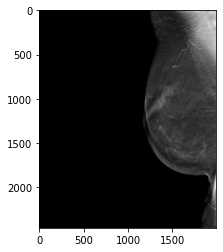

In [ ]:
file_path = "E:/project/data/manifest-1617905855234"
path = view_image_rand(file_path)

# Loading Data

In [ ]:
from pathlib import Path
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Helper function 

In [ ]:
def get_label(row):
  condition = ['Normal','Actionable','Benign','Cancer']
  for con in condition:
    if row.iloc[0][con] == 1:
        if con == 'Normal':
            return con
        else:
            return 'Cancer'

## Processing the data

In [ ]:
labels = pd.read_csv("BCS-DBT labels-train-v2.csv")
print(len(labels))
labels = labels.drop_duplicates("PatientID")

row =  row = labels[labels['PatientID'].str.contains("DBT-P00023")]
print(get_label(row))
# # print(len(labels))
# # # # labels.head(6)

19148
Cancer


In [ ]:
ROOT_PATH = Path("G:/My Drive/ForWin/processed")
df = pd.read_csv("BCS-DBT file-paths-train-v2.csv")

length = len(df)

for index in tqdm(range(16914,length)):
  file_path = Path("E:/project/data/manifest-1617905855234")

  # get the pixel array
  view_series = df.iloc[index]
  spec_path = view_series['descriptive_path']
  spec_path = change_path(spec_path)
  view = view_series["View"]
  path = file_path / spec_path
  image = dcmread_image(fp=path, view=view)

  #resizing the pixel array

  dcm = image[0]/224
  dcm_array = cv2.resize(dcm,(225,225)).astype(np.float16)

  #get the label of that patient
  patient_id = view_series['PatientID']
  row = labels[labels['PatientID'].str.contains(patient_id)]
  label = get_label(row)
  patient_id = patient_id + "_" + view
  
  train_or_val = "training" if index < length*0.9 else "validation"

  current_save_path = ROOT_PATH/train_or_val/str(label)
  current_save_path.mkdir(parents = True, exist_ok = True)
  np.save(current_save_path/patient_id,dcm_array)
    
  print("finish processing image at index {}".format(index))

  0%|          | 0/2234 [00:00<?, ?it/s]

finish processing image at index 16914
finish processing image at index 16915
finish processing image at index 16916
finish processing image at index 16917
finish processing image at index 16918
finish processing image at index 16919
finish processing image at index 16920
finish processing image at index 16921
finish processing image at index 16922
finish processing image at index 16923
finish processing image at index 16924
finish processing image at index 16925
finish processing image at index 16926
finish processing image at index 16927
finish processing image at index 16928
finish processing image at index 16929
finish processing image at index 16930
finish processing image at index 16931
finish processing image at index 16932
finish processing image at index 16933
finish processing image at index 16934
finish processing image at index 16935
finish processing image at index 16936
finish processing image at index 16937
finish processing image at index 16938
finish processing image a

finish processing image at index 17125
finish processing image at index 17126
finish processing image at index 17127
finish processing image at index 17128
finish processing image at index 17129
finish processing image at index 17130
finish processing image at index 17131
finish processing image at index 17132
finish processing image at index 17133
finish processing image at index 17134
finish processing image at index 17135
finish processing image at index 17136
finish processing image at index 17137
finish processing image at index 17138
finish processing image at index 17139
finish processing image at index 17140
finish processing image at index 17141
finish processing image at index 17142
finish processing image at index 17143
finish processing image at index 17144
finish processing image at index 17145
finish processing image at index 17146
finish processing image at index 17147
finish processing image at index 17148
finish processing image at index 17149
finish processing image a

finish processing image at index 17336
finish processing image at index 17337
finish processing image at index 17338
finish processing image at index 17339
finish processing image at index 17340
finish processing image at index 17341
finish processing image at index 17342
finish processing image at index 17343
finish processing image at index 17344
finish processing image at index 17345
finish processing image at index 17346
finish processing image at index 17347
finish processing image at index 17348
finish processing image at index 17349
finish processing image at index 17350
finish processing image at index 17351
finish processing image at index 17352
finish processing image at index 17353
finish processing image at index 17354
finish processing image at index 17355
finish processing image at index 17356
finish processing image at index 17357
finish processing image at index 17358
finish processing image at index 17359
finish processing image at index 17360
finish processing image a

finish processing image at index 17547
finish processing image at index 17548
finish processing image at index 17549
finish processing image at index 17550
finish processing image at index 17551
finish processing image at index 17552
finish processing image at index 17553
finish processing image at index 17554
finish processing image at index 17555
finish processing image at index 17556
finish processing image at index 17557
finish processing image at index 17558
finish processing image at index 17559
finish processing image at index 17560
finish processing image at index 17561
finish processing image at index 17562
finish processing image at index 17563
finish processing image at index 17564
finish processing image at index 17565
finish processing image at index 17566
finish processing image at index 17567
finish processing image at index 17568
finish processing image at index 17569
finish processing image at index 17570
finish processing image at index 17571
finish processing image a

finish processing image at index 17758
finish processing image at index 17759
finish processing image at index 17760
finish processing image at index 17761
finish processing image at index 17762
finish processing image at index 17763
finish processing image at index 17764
finish processing image at index 17765
finish processing image at index 17766
finish processing image at index 17767
finish processing image at index 17768
finish processing image at index 17769
finish processing image at index 17770
finish processing image at index 17771
finish processing image at index 17772
finish processing image at index 17773
finish processing image at index 17774
finish processing image at index 17775
finish processing image at index 17776
finish processing image at index 17777
finish processing image at index 17778
finish processing image at index 17779
finish processing image at index 17780
finish processing image at index 17781
finish processing image at index 17782
finish processing image a

finish processing image at index 17969
finish processing image at index 17970
finish processing image at index 17971
finish processing image at index 17972
finish processing image at index 17973
finish processing image at index 17974
finish processing image at index 17975
finish processing image at index 17976
finish processing image at index 17977
finish processing image at index 17978
finish processing image at index 17979
finish processing image at index 17980
finish processing image at index 17981
finish processing image at index 17982
finish processing image at index 17983
finish processing image at index 17984
finish processing image at index 17985
finish processing image at index 17986
finish processing image at index 17987
finish processing image at index 17988
finish processing image at index 17989
finish processing image at index 17990
finish processing image at index 17991
finish processing image at index 17992
finish processing image at index 17993
finish processing image a

finish processing image at index 18180
finish processing image at index 18181
finish processing image at index 18182
finish processing image at index 18183
finish processing image at index 18184
finish processing image at index 18185
finish processing image at index 18186
finish processing image at index 18187
finish processing image at index 18188
finish processing image at index 18189
finish processing image at index 18190
finish processing image at index 18191
finish processing image at index 18192
finish processing image at index 18193
finish processing image at index 18194
finish processing image at index 18195
finish processing image at index 18196
finish processing image at index 18197
finish processing image at index 18198
finish processing image at index 18199
finish processing image at index 18200
finish processing image at index 18201
finish processing image at index 18202
finish processing image at index 18203
finish processing image at index 18204
finish processing image a

finish processing image at index 18391
finish processing image at index 18392
finish processing image at index 18393
finish processing image at index 18394
finish processing image at index 18395
finish processing image at index 18396
finish processing image at index 18397
finish processing image at index 18398
finish processing image at index 18399
finish processing image at index 18400
finish processing image at index 18401
finish processing image at index 18402
finish processing image at index 18403
finish processing image at index 18404
finish processing image at index 18405
finish processing image at index 18406
finish processing image at index 18407
finish processing image at index 18408
finish processing image at index 18409
finish processing image at index 18410
finish processing image at index 18411
finish processing image at index 18412
finish processing image at index 18413
finish processing image at index 18414
finish processing image at index 18415
finish processing image a

finish processing image at index 18602
finish processing image at index 18603
finish processing image at index 18604
finish processing image at index 18605
finish processing image at index 18606
finish processing image at index 18607
finish processing image at index 18608
finish processing image at index 18609
finish processing image at index 18610
finish processing image at index 18611
finish processing image at index 18612
finish processing image at index 18613
finish processing image at index 18614
finish processing image at index 18615
finish processing image at index 18616
finish processing image at index 18617
finish processing image at index 18618
finish processing image at index 18619
finish processing image at index 18620
finish processing image at index 18621
finish processing image at index 18622
finish processing image at index 18623
finish processing image at index 18624
finish processing image at index 18625
finish processing image at index 18626
finish processing image a

finish processing image at index 18813
finish processing image at index 18814
finish processing image at index 18815
finish processing image at index 18816
finish processing image at index 18817
finish processing image at index 18818
finish processing image at index 18819
finish processing image at index 18820
finish processing image at index 18821
finish processing image at index 18822
finish processing image at index 18823
finish processing image at index 18824
finish processing image at index 18825
finish processing image at index 18826
finish processing image at index 18827
finish processing image at index 18828
finish processing image at index 18829
finish processing image at index 18830
finish processing image at index 18831
finish processing image at index 18832
finish processing image at index 18833
finish processing image at index 18834
finish processing image at index 18835
finish processing image at index 18836
finish processing image at index 18837
finish processing image a

finish processing image at index 19024
finish processing image at index 19025
finish processing image at index 19026
finish processing image at index 19027
finish processing image at index 19028
finish processing image at index 19029
finish processing image at index 19030
finish processing image at index 19031
finish processing image at index 19032
finish processing image at index 19033
finish processing image at index 19034
finish processing image at index 19035
finish processing image at index 19036
finish processing image at index 19037
finish processing image at index 19038
finish processing image at index 19039
finish processing image at index 19040
finish processing image at index 19041
finish processing image at index 19042
finish processing image at index 19043
finish processing image at index 19044
finish processing image at index 19045
finish processing image at index 19046
finish processing image at index 19047
finish processing image at index 19048
finish processing image a